In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2

In [10]:
# Definisikan ukuran gambar dan direktori data
image_size = 299
data_dir = "data/Brain Tumor MRI Dataset/"
labels = ["glioma", "notumor", "meningioma", "pituitary"]

In [12]:
def load_images(directory, image_size):
    X = []
    y = []

    for label in labels:
        folderPath = os.path.join(directory, label)
        for filename in os.listdir(folderPath):
            img = cv2.imread(os.path.join(folderPath, filename))
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(label)

    return np.array(X), np.array(y)

In [13]:
X, y = load_images(os.path.join(data_dir, "Training"), image_size)
X_test, y_test = load_images(os.path.join(data_dir, "Testing"), image_size)

In [14]:
X = np.concatenate((X, X_test), axis=0)
y = np.concatenate((y, y_test), axis=0)

In [15]:
X, y = shuffle(X, y, random_state=42)

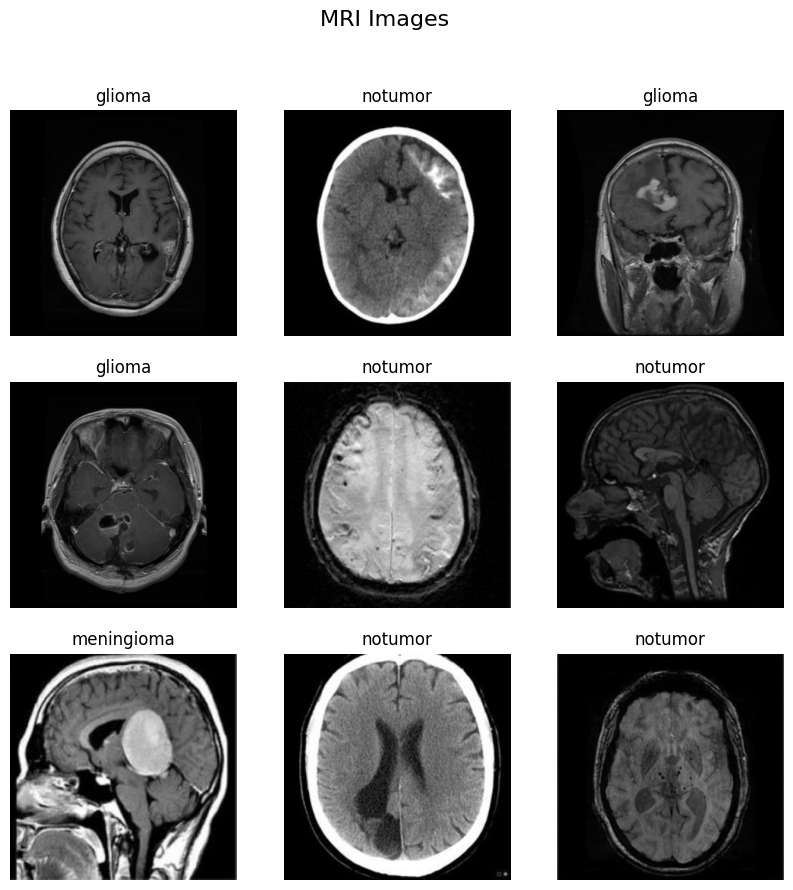

In [16]:
def visualize_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=16)

    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')

    plt.show()

visualize_images(X, y, 'MRI Images')

In [17]:
y = tf.keras.utils.to_categorical([labels.index(label) for label in y])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(X_train)

In [21]:
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

for layer in xception_model.layers:
    layer.trainable = False

In [22]:
model = keras.Sequential([
    xception_model,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(4, activation="softmax")
])

In [23]:
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50


c:\Users\budhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 127s 9s/step - accuracy: 0.2912 - loss: 19.7762 - val_accuracy: 0.8250 - val_loss: 0.9434
Epoch 2/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1:19 8s/step - accuracy: 0.4688 - loss: 8.1803

c:\Users\budhi\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 855ms/step - accuracy: 0.4688 - loss: 8.1803 - val_accuracy: 0.7500 - val_loss: 2.1761
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 113s 9s/step - accuracy: 0.6256 - loss: 7.3324 - val_accuracy: 0.7750 - val_loss: 1.7792
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 839ms/step - accuracy: 0.5312 - loss: 5.6589 - val_accuracy: 0.7500 - val_loss: 1.6173
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 112s 9s/step - accuracy: 0.6544 - loss: 3.8923 - val_accuracy: 0.7750 - val_loss: 2.0112
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.6875 - loss: 3.6868 - val_accuracy: 0.7750 - val_loss: 1.9372
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 109s 8s/step - accuracy: 0.6612 - loss: 3.6198 - val_accuracy: 0.7750 - val_loss: 0.9106
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 915ms/step - accuracy: 0.7812 - loss: 1.6298 - val_accuracy: 0.7750 - val_loss: 1.1402
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 113s 8s/step - accuracy: 0.7040 - loss: 2.2470 - val_accuracy: 0.9500 - val_

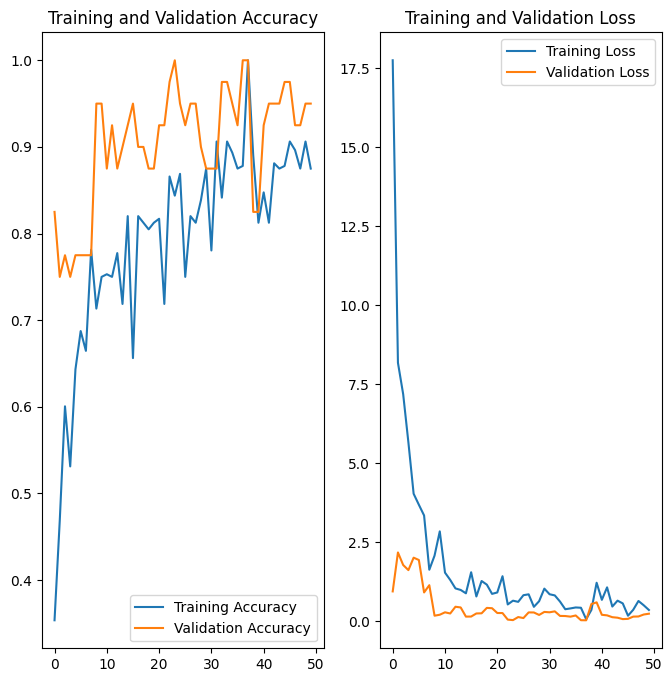

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9458 - loss: 0.2502


[0.2376672476530075, 0.949999988079071]

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step


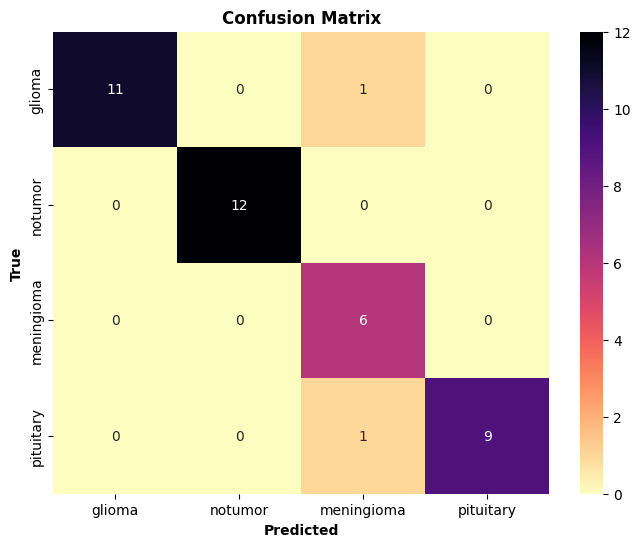

In [27]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

In [28]:
def preprocess_image(image_path, image_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_tumor_class(model, image_path, labels):
    image = preprocess_image(image_path, image_size)
    prediction = model.predict(image)
    predicted_class = labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return predicted_class, confidence

In [32]:
image_path = "data/Brain Tumor MRI Dataset/Testing/pituitary/Te-pi_0031.jpg"
predicted_class, confidence = predict_tumor_class(model, image_path, labels)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Predicted Class: pituitary
Confidence: 100.00%


In [33]:
from keras.models import load_model

model.save('model.h5')